In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
%config InlineBackend.figure_format = 'retina'

In [56]:
def Line_mit_standardab(df,x,y,xLabel,yLabel,title): 
    fig = go.Figure(data=go.Scatter(
        x=x,
        y=y,
        error_y=dict(
            type='data',
            array=(df.max(axis=1)- df.mean(axis=1)),# iteration über rows (0 iteriert über columns)
            color='purple',
            visible=True),
        ))
    fig.update_layout(title=title)
    fig.update_xaxes(tickangle=45, title_text=xLabel)
    fig.update_yaxes(title_text=yLabel)
    fig.show()

def boxplot(df, variable, labels, show_y_label, width = None, medianprops=None):
    plt.boxplot(df[variable],labels=labels, widths=width, medianprops=medianprops)
    if (show_y_label):
            plt.ylabel(variable)

def barplot(df, xachse, yachse, color=None, text = None):     
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text, height=700, labels=dict(Preis = 'Preis [€]'))
    fig.update_traces(marker_line_color='black')
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()

def bar_mit_facet(df, xachse, yachse, reihe,color=None, text = None):
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text,height=700, 
             labels=dict(Preis = "Preis [€]",Anzahl_Tomaten='Anzahl'),facet_row=(reihe) )
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()
    
def bar_mit_std(list_x_values, list_y_values, list_std,tick_label=None, y_label=None, x_label=None):
    errorbars=np.array([np.zeros(len(list_std)), list_std])
    plt.bar(x=list_x_values, height=list_y_values,width=0.3,color='lightgray',
             edgecolor='black',tick_label=tick_label,yerr=errorbars,capsize=4)
    plt.ylabel(y_label)
    plt.xlabel(x_label)    

### Line_mit_standardab 
>(dataframe, x-achse, y-achse, x-label, y-label, title)
### boxplot 
>(df, variable (str),labels als liste von strings, show_y_label True oder False, width(float), medianprops (dict) color:) 
### barplot 
>(df, name x-achse str, name y-achse str, color falls nötig str, text in den bars falls nötig str)
### bar_mit_facet
>(reihe: (str) welche variable pro Reihe(facet))
### bar_mit_std 
>(list_x_values, list_y_values, list_std liste der Standardabweichungen ,tick_label (list),..)

- Datentypen anzeigen mit print(frame.dtypes)
- Change size Matplotlip figure,axes=plt.subplots(figsize=(20,10))

In [43]:
abw=pd.read_csv("Absenteeism_at_work.csv",sep=";")
abw['Incident_count'] = abw['ID'].map(abw['ID'].value_counts())
with_count = abw.sort_values(by=['Incident_count'], ascending = False)
dfHäufig = with_count[0:244]
dfSelten = with_count[628:740]
dfHäufig_u = dfHäufig.drop_duplicates(subset=['ID'])
dfSelten_u =  dfSelten.drop_duplicates(subset=['ID'])

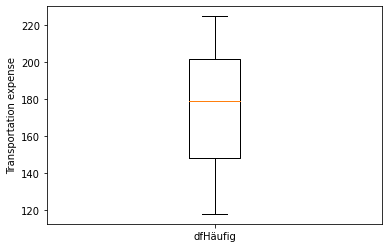

In [38]:
boxplot(dfHäufig_u, 'Transportation expense',['dfHäufig'],True)

In [44]:
abw

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Incident_count
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,40
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,34
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,113
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,6
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,40
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,23
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,1
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,2


In [54]:
listeX = list(abw['ID'].unique())
listeY =[]
listeSTD = []
for i in listeX:
    temp = abw[abw['ID']==i]
    m = temp['Absenteeism time in hours'].mean()
    listeY.append(m)
    
for i in listeX:
    temp = abw[abw['ID']==i]
    m = np.std(temp['Absenteeism time in hours'])
    listeSTD.append(m)

In [55]:
print(listeX)
print(listeY)
print(listeSTD)

[11, 36, 3, 7, 10, 20, 14, 1, 24, 6, 33, 18, 30, 2, 19, 27, 34, 5, 15, 29, 28, 13, 22, 17, 31, 23, 32, 9, 26, 21, 8, 25, 12, 16, 4, 35]
[11.25, 9.147058823529411, 4.265486725663717, 5.0, 7.75, 7.285714285714286, 16.413793103448278, 5.260869565217392, 8.466666666666667, 9.0, 3.0416666666666665, 7.375, 4.428571428571429, 4.166666666666667, 2.0, 3.857142857142857, 6.254545454545455, 5.473684210526316, 6.837837837837838, 4.2, 4.565789473684211, 12.2, 5.5, 6.3, 5.333333333333333, 5.0, 3.2, 32.75, 16.6, 5.333333333333333, 0.0, 4.2, 4.857142857142857, 8.0, 0.0, 0.0]
[16.286113716906193, 23.880994600606293, 4.931419403120141, 5.627314338711377, 7.241374178980119, 9.864041754164019, 26.26590453010861, 3.6381719167777447, 8.02800653268848, 2.6457513110645907, 2.4062274529968186, 5.893587617063142, 4.865538961693257, 3.8477987935383986, 1.632993161855452, 2.7479120088101916, 11.394126368549689, 4.296490869886011, 11.114912100450027, 3.249615361854384, 12.66089662401916, 18.87573398131403, 9.96024

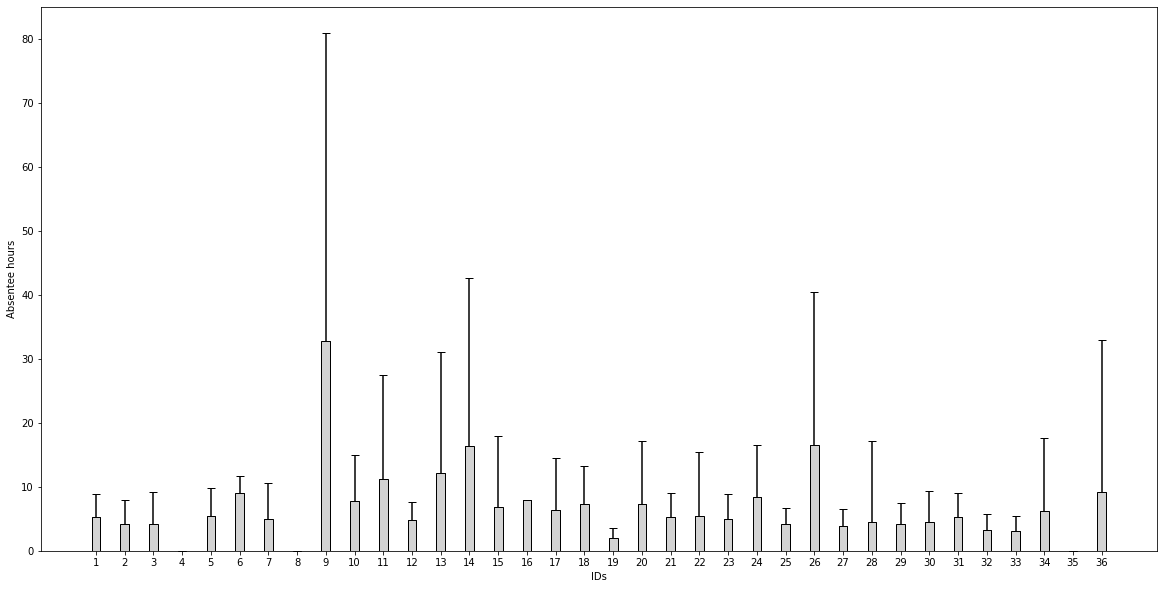

In [62]:
figure,axes=plt.subplots(figsize=(20,10))
bar_mit_std(listeX, listeY, listeSTD,tick_label=listeX, x_label='IDs', y_label='Absentee hours')

In [66]:
listY = [i['Son'].mean() for i in [dfHäufig_u,dfSelten_u]]
listSTD = [np.std(i['Son'])for i in [dfHäufig_u,dfSelten_u]]

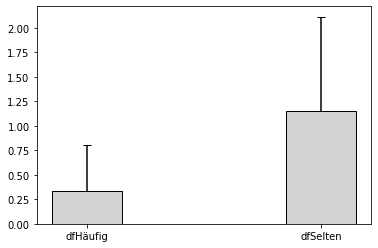

In [67]:
bar_mit_std(['dfHäufig','dfSelten'],listY,listSTD)

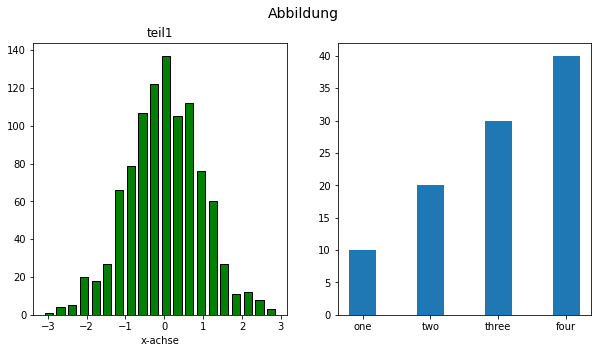

In [22]:
figure,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
figure.suptitle('Abbildung',fontsize = 14);
axes[0].set_title('teil1')
axes[0].set_xlabel('x-achse');
values = np.random.normal(size=1000);
axes[0].hist(values,color='green', edgecolor='black',rwidth=0.7, bins=20);
axes[1].bar(x=[1,2,3,4], height = [10,20,30,40], width = 0.4, tick_label=['one','two','three','four']);